<a href="https://colab.research.google.com/github/ShailajaMamdekar/Retail_Online_Analysis/blob/main/Online_Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-21 18:03:36--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [         <=>        ]  22.62M  1.41MB/s    in 24s     

2025-02-21 18:04:01 (977 KB/s) - ‘online+retail.zip.1’ saved [23715478]



In [ ]:
!unzip online+retail.zip.1

Archive:  online+retail.zip.1
 extracting: Online Retail.xlsx      


In [ ]:
df1=pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo': 'string', 'stockCode': 'string', 'Description': 'string', 'country': 'string'})
df1.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df1.shape

(541909, 8)

In [ ]:
 df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2), string(2)
memory usage: 33.1+ MB


In [ ]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df1[df1.StockCode=="22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df1[df1.StockCode=='21134'].Description.mode()

,Description


In [ ]:
df1[["StockCode", "Description"]].value_counts()

,,count
StockCode,Description,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
22423,REGENCY CAKESTAND 3 TIER,2200
85099B,JUMBO BAG RED RETROSPOT,2159
47566,PARTY BUNTING,1727
20725,LUNCH BAG RED RETROSPOT,1638
...,...,...
20713,wrongly marked. 23343 in box,1
20725,LUNCH BAG RED SPOTTY,1
20748,Found,1


In [ ]:
most_freq = df1[["StockCode", "Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,20713,wrongly marked. 23343 in box,1
4788,20725,LUNCH BAG RED SPOTTY,1
4789,20748,Found,1
4790,85204,lost??,1


In [ ]:
most_freq[most_freq.StockCode=="85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [ ]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4764,90184c,BLACK CHUNKY BEAD BRACELET W STRAP,1
4766,37330,BIG POLKADOT MUG,1
4777,85224,ASSORTED COLOUR SILK GLASSES CASE,1
4778,90020,FILIGREE DIAMANTE CHAIN,1


In [ ]:
most_freq.columns = ["StockCode", "freq_Description", "count"]

df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
df2["Description"] = df2["freq_Description"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_Description,112
count,112


In [ ]:
df2.dropna(subset=["Description"], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_Description,0
count,0


In [ ]:
df2.drop(columns = ["freq_Description"], inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,449.0


In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,count
count,541797.000000,541797,541797.000000,406829.000000,541797.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570,424.567967
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,1.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000,151.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000,303.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000,573.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2302.000000
std,218.103428,NaN,96.769831,1713.600303,391.068884


In [ ]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,77.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,47.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,591.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,219.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,156.0
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,278.0
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,571.0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,182.0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,767.0


In [ ]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,3.0
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,3.0


In [ ]:
df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,count
count,530104.000000,530104,530104.000000,397884.000000,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453,424.852891
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,1.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000,152.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000,303.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000,573.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,2302.000000
std,155.524124,NaN,35.915681,1713.141560,389.658735


In [ ]:
df3.Quantity.quantile(0.9999)

1439.8763999990188

In [ ]:
df3[df3.Quantity>1500].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,126.0
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,542.0
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom,24.0


In [ ]:
df4 = df3.copy()
df4["TotalPrice"] = df4["Quantity"] * df4["UnitPrice"]
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2302.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,328.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,293.0,22.00


In [ ]:
df4["Month"] = df4["InvoiceDate"].dt.month
df4.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2302.0,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,328.0,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,293.0,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,473.0,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,449.0,20.34,12


#### Visualization & EDA


##### 1.Plot Monthly Sales

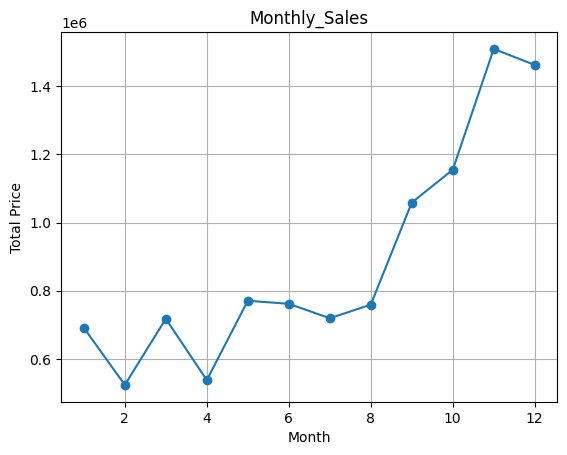

In [ ]:
monthly_sales = df4.groupby("Month")["TotalPrice"].sum()
monthly_sales.plot(kind="line", title="Monthly_Sales", marker="o")
plt.xlabel("Month")
plt.ylabel("Total Price")
plt.grid()
plt.show()


## Insights ##
Total sales started rising up in August having a peek in November.This is likely due to the holiday season at the end of the year


##### 2. Top 5 Countries

In [ ]:
# prompt: plot horizontal bar chart for top 5 countries by total sales

import matplotlib.pyplot as plt
top_5_countries = df4.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)
top_5_countries


,TotalPrice
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


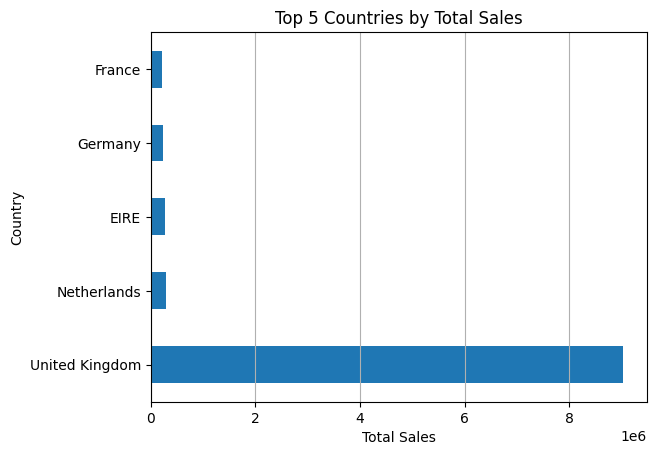

In [ ]:
top_5_countries.plot(kind='barh', title='Top 5 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()


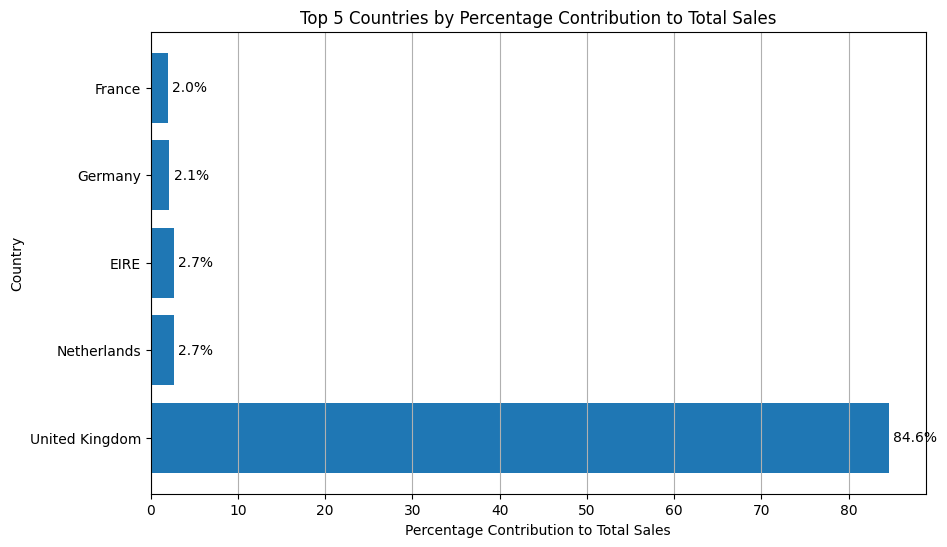

In [ ]:
# prompt: plot same chart as above but this time use percentage contribution.Show % on the bar

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# Assuming df4 is already created as in the previous code

country_wise_sales= df4.groupby('Country')['TotalPrice'].sum()
total_Price = country_wise_sales.sum()

top_5_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentages = (top_5_countries / total_Price) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_countries.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')


# Add percentage labels on the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()


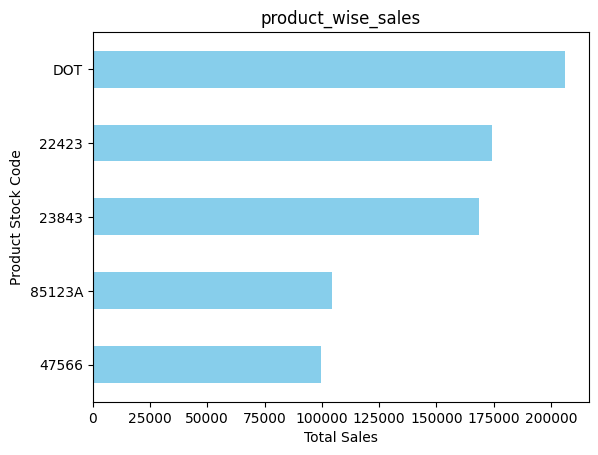

In [ ]:
product_wise_sales = df4.groupby("StockCode")["TotalPrice"].sum().sort_values(ascending=False).head(10)

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color="Skyblue")
plt.title("product_wise_sales")
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
product_wise_sales.sort_values(ascending=False)

,TotalPrice
StockCode,
DOT,206248.77
22423,174484.74
23843,168469.60
85123A,104518.80
47566,99504.33
85099B,94340.05
23166,81700.92
M,78110.27
POST,78101.88


In [ ]:
product_wise_sales.sum()

1152444.3499999999

In [ ]:
df4[df4.StockCode=='DOT']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count,TotalPrice,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,709.0,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,709.0,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,709.0,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,709.0,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,709.0,498.47,12
...,...,...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,709.0,1008.96,12
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,709.0,1683.75,12
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,709.0,938.59,12
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,709.0,933.17,12


In [ ]:
for stock_code in top_5_products.index:
  description = df4[df4.StockCode==stock_code].Description.iloc[0]
  print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


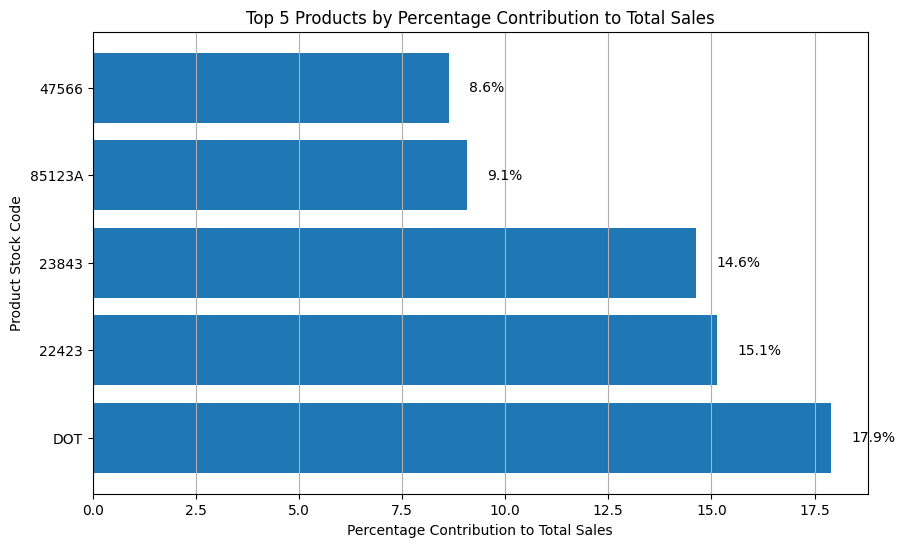

In [ ]:
# prompt: plot same chart as above for product sales but use persentage this time .show % on the bar

# Assuming df4 is already created as in the previous code
total_sales = product_wise_sales.sum()
percentages = (top_5_products / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products.index.astype(str), percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels on the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()


#####4. RFM Analysis


In [ ]:
current_date=df4["InvoiceDate"].max() + pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm = df4.groupby("CustomerID").agg({
    "InvoiceDate" : lambda x: (current_date - x.max()).days,
    "InvoiceNo" : "count",
    "TotalPrice" : "sum"

})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
df4[df4.CustomerID==12347]["TotalPrice"].sum()

4310.000000000001

In [ ]:

# Segment customers based on RFM scores
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFMScore'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,R_Segment,F_Segment,M_Segment,RFMScore
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1,1,4,6
12347.0,2,182,4310.00,4,4,4,4,4,4,12
12348.0,75,31,1797.24,2,2,4,2,2,4,8
12349.0,19,73,1757.55,3,3,4,3,3,4,10
12350.0,310,17,334.40,1,1,2,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1,1,1,3
18281.0,181,7,80.82,1,1,1,1,1,1,3
18282.0,8,12,178.05,4,1,1,4,1,1,6


In [ ]:
# Customer with high RFM Scores
rfm.sort_values("RFMScore", ascending=False)

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,R_Segment,F_Segment,M_Segment,RFMScore
CustomerID,,,,,,,,,,
18198.0,4,159,5425.56,4,4,4,4,4,4,12
18210.0,2,134,2621.38,4,4,4,4,4,4,12
18225.0,3,271,5509.12,4,4,4,4,4,4,12
18283.0,4,756,2094.88,4,4,4,4,4,4,12
16983.0,13,148,1931.25,4,4,4,4,4,4,12
...,...,...,...,...,...,...,...,...,...,...
12402.0,323,11,225.60,1,1,1,1,1,1,3
18185.0,249,17,304.25,1,1,1,1,1,1,3
18190.0,192,15,284.46,1,1,1,1,1,1,3


##### 5. Customer churn Analysis

In [ ]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2302.0,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,328.0,20.34,12


In [ ]:
# Create a basket matrix for associate rule mining
customer_last_purchase = df4.groupby("CustomerID")["InvoiceDate"].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [ ]:
type(customer_last_purchase)

pandas.core.series.Series

In [ ]:
current_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [ ]:
# Define churn threshold (eg , 90 days without purchase)
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


number of Churned Customers: 1449


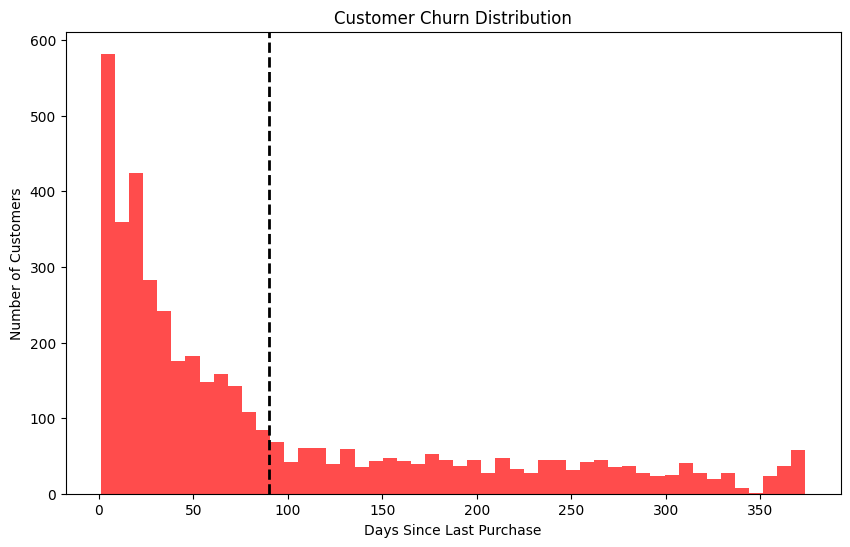

In [ ]:
print("number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10,6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(x=churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')
plt.show()
